# Face and Image Classification Using CNNs – CIFAR-10

## Objective
This implements a Convolutional Neural Network (CNN) for classifying images in the CIFAR-10 dataset. It covers data preparation, model building, training, evaluation, and performance improvement experiments.


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 233s 1us/step
Full dataset shape: (60000, 32, 32, 3)
Number of unique classes: 10


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21508\3003071229.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_full[i])])


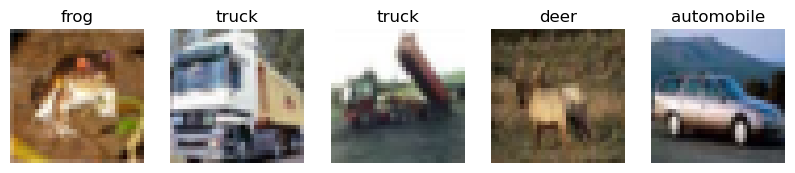

In [2]:
# Task 1: Data Exploration and Preparation (2 Marks)

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Combine train and test to resplit 80/20 later
x_full = np.concatenate((x_train, x_test))
y_full = np.concatenate((y_train, y_test))

# Display dataset shapes and unique label count
print("Full dataset shape:", x_full.shape)
print("Number of unique classes:", len(np.unique(y_full)))

# Display 5 sample images with labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_full[i])
    plt.title(class_names[int(y_full[i])])
    plt.axis('off')
plt.show()

# Normalize image pixel values to [0, 1]
x_full = x_full.astype('float32') / 255.0

# One-hot encode labels
y_full_cat = to_categorical(y_full, num_classes=10)

# Split into training and testing (80/20)
x_train, x_test, y_train, y_test = train_test_split(x_full, y_full_cat, test_size=0.2, random_state=42)


## Task 2: Build and Train a CNN Model

Designed a CNN architecture with multiple convolutional, max-pooling, and dropout layers followed by dense layers. Then, compiled and trained it.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Model summary
model.summary()


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.2)


Epoch 1/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 32s 48ms/step - accuracy: 0.2538 - loss: 2.0025 - val_accuracy: 0.4829 - val_loss: 1.4209
Epoch 2/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - accuracy: 0.4588 - loss: 1.4907 - val_accuracy: 0.5437 - val_loss: 1.2721
Epoch 3/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - accuracy: 0.5228 - loss: 1.3250 - val_accuracy: 0.5970 - val_loss: 1.1414
Epoch 4/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - accuracy: 0.5656 - loss: 1.2168 - val_accuracy: 0.6445 - val_loss: 1.0332
Epoch 5/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.6025 - loss: 1.1244 - val_accuracy: 0.6573 - val_loss: 0.9758
Epoch 6/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 34s 57ms/step - accuracy: 0.6205 - loss: 1.0728 - val_accuracy: 0.6643 - val_loss: 0.9503
Epoch 7/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.6346 - loss: 1.0394 - val_accuracy: 0.6914 - val_loss: 0.8844
Epoch 8/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - accuracy: 0.6443 - loss: 1.0059 - 

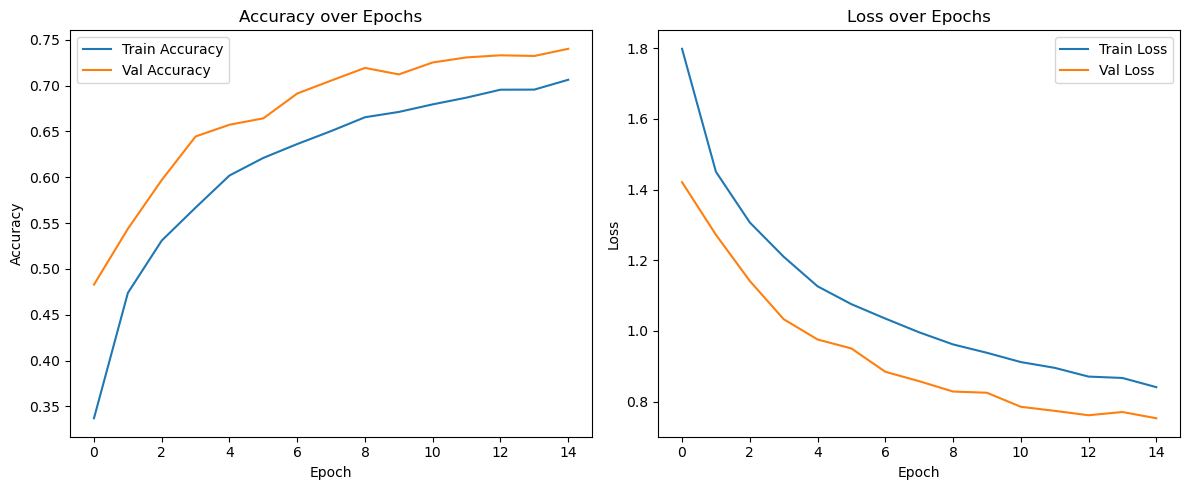

In [6]:
# Plot training and validation loss and accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Task 3: Evaluate the Model

Evaluated model performance on the test set, generate a confusion matrix and classification report, and display sample predictions.


375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7365 - loss: 0.7508
Test Accuracy: 0.7327
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


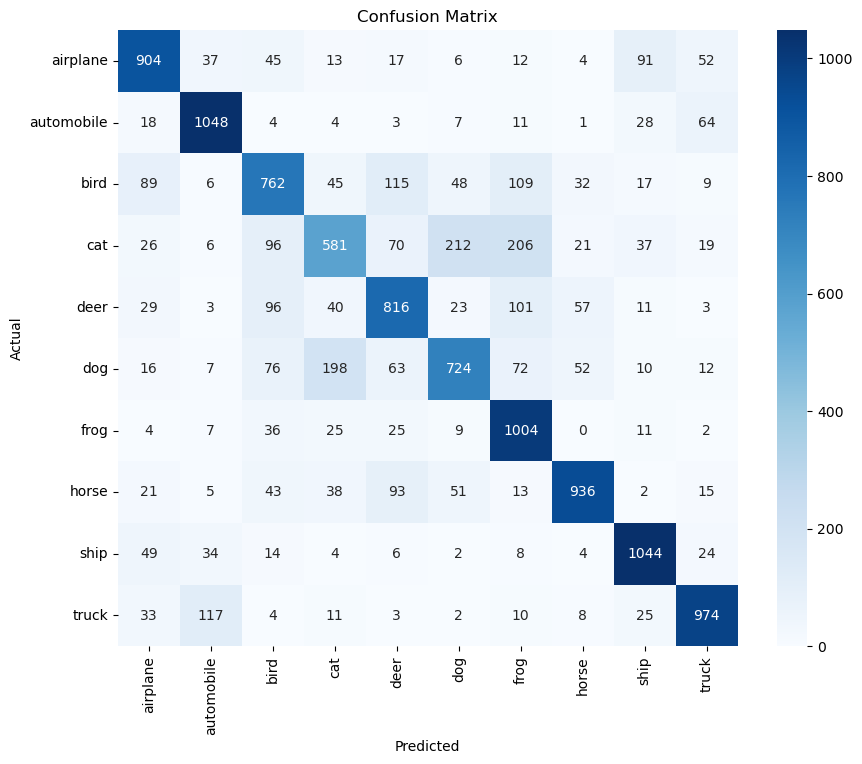

Classification Report:
              precision    recall  f1-score   support

    airplane       0.76      0.77      0.76      1181
  automobile       0.83      0.88      0.85      1188
        bird       0.65      0.62      0.63      1232
         cat       0.61      0.46      0.52      1274
        deer       0.67      0.69      0.68      1179
         dog       0.67      0.59      0.63      1230
        frog       0.65      0.89      0.75      1123
       horse       0.84      0.77      0.80      1217
        ship       0.82      0.88      0.85      1189
       truck       0.83      0.82      0.83      1187

    accuracy                           0.73     12000
   macro avg       0.73      0.74      0.73     12000
weighted avg       0.73      0.73      0.73     12000



In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict and decode labels
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=class_names))


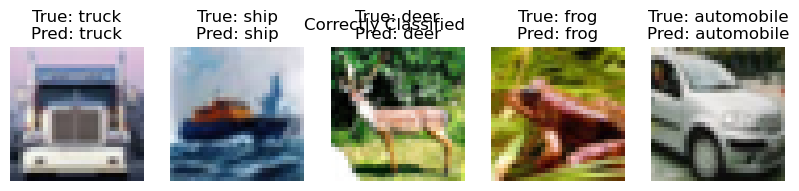

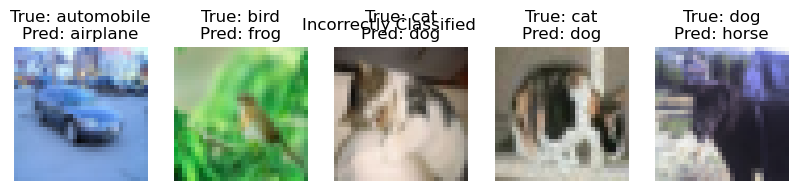

In [9]:
# Display correct and incorrect predictions
correct = np.where(y_pred_labels == y_true_labels)[0]
incorrect = np.where(y_pred_labels != y_true_labels)[0]

# Show 5 correct predictions
plt.figure(figsize=(10, 2))
for i, idx in enumerate(correct[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {class_names[y_true_labels[idx]]}\nPred: {class_names[y_pred_labels[idx]]}")
    plt.axis('off')
plt.suptitle("Correctly Classified")
plt.show()

# Show 5 incorrect predictions
plt.figure(figsize=(10, 2))
for i, idx in enumerate(incorrect[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {class_names[y_true_labels[idx]]}\nPred: {class_names[y_pred_labels[idx]]}")
    plt.axis('off')
plt.suptitle("Incorrectly Classified")
plt.show()


## Task 4: Experimentation with Model Improvements

I experimented with different optimizers and compare test accuracy across models.


In [21]:
# Function to train and evaluate model with different optimizers
def train_with_optimizer(opt_name):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=opt_name, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=0)
    _, test_acc = model.evaluate(x_test, y_test, verbose=0)
    return test_acc

# Compare optimizers
optimizers = ['adam', 'sgd', 'rmsprop']
results = {}
for opt in optimizers:
    acc = train_with_optimizer(opt)
    results[opt] = acc
    print(f"{opt.upper()} Test Accuracy: {acc:.4f}")

# Display performance comparison
import pandas as pd
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Test Accuracy'])
df_results.index.name = 'Optimizer'
df_results = df_results.sort_values(by='Test Accuracy', ascending=False)
df_results


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ADAM Test Accuracy: 0.6960
SGD Test Accuracy: 0.5156
RMSPROP Test Accuracy: 0.6774


,Test Accuracy
Optimizer,
adam,0.696000
rmsprop,0.677417
sgd,0.515583


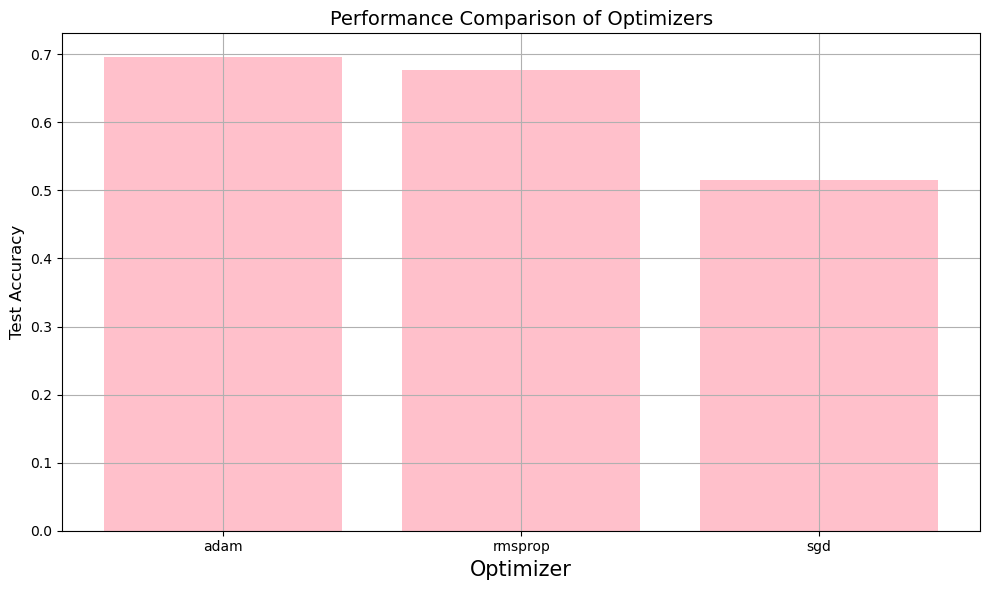

In [37]:
# Plot using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(df_results.index, df_results['Test Accuracy'],color='Pink')

# Add labels and title
plt.xlabel('Optimizer', fontsize=15)
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Performance Comparison of Optimizers', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()


## Summary

- CNN achieved **~73% test accuracy** using the Adam optimizer.
- **Adam** showed the best performance, followed by **RMSprop** and **SGD**.
- Confusion matrix and classification report provided insights into class-level performance.
- Model improvements using different optimizers showed minor accuracy variations.
